# Data Preprocessing

In [37]:
import pandas as pd
from pandas import Series
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [137]:
#data = pd.ExcelFile("/home/tcs/Desktop/po_data.xlsx")  #Type 1 to read excel sheets
#df = data.parse("Sheet1")
#df.head()

#Original data frame
data = pd.read_excel("/home/tcs/Desktop/Ericsson_sample_po_data/po_data.xlsx",sheetname=0) #Type 2 to read excel sheets

In [138]:
#Printing total no of columns  in data frame
full_list = data.columns
print len(full_list)
df = data
#colmns = pd.DataFrame(data.columns)

81


In [139]:
#colmns.to_excel('preprocessing_data.xlsx')

In [140]:
df = df.dropna(axis=1,how="all")    #Droping empty columns 
l = df.columns
print "non empty columns--",len(l)
for i in l:
    ser = df[i]
#    print i,"---------",int_ser.dtype
    if(ser.dtype ==  "int64" or ser.dtype == "float64" or ser.dtype == "datetime64[ns]" ):
        if(ser.dtype == "datetime64[ns]"):
            del df[i]            #Droping datime columns whose mean is zero
        elif(df[i].mean() == 0):
            del df[i]            #Droping numeric columns whose mean is zero
#        print df[i].mean()                              
print "non zero mean columns----",len(df.columns)

non empty columns-- 62
non zero mean columns---- 52


In [141]:
# printing columns with data more than 50%
# Removing the columns with data filled less than 50%
for i in df.columns:
    if(float(df[i].count())/float(df[i].shape[0])*100 <= 50 ):
        del df[i]
print "columns with data more than 50%-----",len(df.columns)

columns with data more than 50%----- 33


In [142]:
# deleting columns with zero variance
for i in df.columns:
#    print i,"...........",len(np.unique(df[i]))
    if(len(np.unique(df[i])) == 1):
        del df[i]
print "deleting columns with zero variance:--",len(df.columns)
#for i in df.columns:
#    ser = df[i]
#    print i,".......",ser.dtype
# print i,"-----",np.count_nonzero(np.correlate(df[i],df[i],"same"))
#        print np.correlate(df[i],df[i],"same")
#    if(ser.dtype == "int64" or ser.dtype == "float64"):
#        print i,"...........",df[i].var()

deleting columns with zero variance:-- 31


In [143]:
# Deleting columns with 90% of no variance
for i in df.columns:
    col_value,val_count = np.unique(df[i], return_counts=True)
    for j in val_count:
        if ((float(j)/float(df.shape[0])*100) > 90):
            del df[i]
print "deleting columns with 90% of no variance-----",len(df.columns)

deleting columns with 90% of no variance----- 22


In [144]:
# Deleting columns with future prediction 
del df['Still to be delivered (qty)']
del df['Still to be delivered (value)']
del df['Still to be invoiced (qty)']
del df['Still to be invoiced (val.)']
#for i in df.columns:
#    col_value,val_count = np.unique(df[i], return_counts=True)
#    ser = df[i]
#    for j in val_count:
#        if ((float(j)/float(df.shape[0])*100) > 50 and (ser.dtype == "float64" or ser.dtype == "int64")):
#            print i,".............",ser.dtype
#            print "non variance with min of 50%-----",i
#            del df[i]

In [145]:
exception_list = ['Purchasing Group','Plant','Purchasing Document','Short Text']
print df['Short Text']

0                       OBD Integration_EasyReach
1                     OBD Customization_EasyReach
2                             OBD Setup_EasyReach
3                               OBD 3PP_EasyReach
4                                         VAT/CST
5                            Application Services
6                            Application Services
7                            Application Services
8                            Application Services
9                            Application Services
10                           Application Services
11                               Managed Services
12                           Application Services
13        PCC Multi Account Charging Feature with
14                Multi Account Reporting Feature
15                 Annual Support and Maintenance
16           HXC remote deployment up to 80 hours
17                     PCC Multi Account Charging
18        PCC API Secure Multi Account Activation
19                 Annual Support and Maintenance


In [146]:
# deleting non categorical and non relavant columns
del df['Name of Vendor']
del df['Order Quantity']
del df['Vendor/supplying plant']
del df['Purch. Organization']
del df['Item']
del df['Net price']
del df['Currency']
del df['Tax code']
del df['Net Order Value']
del df['Order Price Unit'] ##Removing because duplicate column Order Unit and Order Price Unit 	

In [147]:
print exception_list
df.head().transpose()
#item, count = np.unique(df[''],return_counts="True")
#print len(item)

['Purchasing Group', 'Plant', 'Purchasing Document', 'Short Text']


,0,1,2,3,4
Purchasing Document,4514938634,4514938634,4514938634,4514938650,4514938650
Plant,2235,2235,2235,2235,2235
Purchasing Doc. Type,NB,NB,NB,NB,NB
Purchasing Group,IN4,IN4,IN4,IN4,IN4
Short Text,OBD Integration_EasyReach,OBD Customization_EasyReach,OBD Setup_EasyReach,OBD 3PP_EasyReach,VAT/CST
Material Group,ZIS1200,ZIS1200,ZIS1200,ZIS1200,ZIS1200
Acct Assignment Cat.,P,P,P,P,P
Order Unit,PC,PC,PC,PC,PU


In [170]:
# copying into a dummy data frame
model_df = pd.DataFrame({'Purchasing Doc. Type':list(df['Purchasing Doc. Type']),
                         'Material Group':list(df['Material Group']),
                         'Acct Assignment Cat.':list(df['Acct Assignment Cat.']),
                         'Order Unit':list(df['Order Unit']),
                         'Plant':list(df['Plant']),
                         'Purchasing Document':list(df['Purchasing Document'])})
model_df.head().transpose()

,0,1,2,3,4
Acct Assignment Cat.,P,P,P,P,P
Material Group,ZIS1200,ZIS1200,ZIS1200,ZIS1200,ZIS1200
Order Unit,PC,PC,PC,PC,PU
Plant,2235,2235,2235,2235,2235
Purchasing Doc. Type,NB,NB,NB,NB,NB
Purchasing Document,4514938634,4514938634,4514938634,4514938650,4514938650


In [171]:
#print np.unique(model_df['Purchasing Group'],return_counts="True")
print "Before Imputing:--------"
#---Cheking whether dataframe contains any 0's 
print "Count of 0's:----------"
print((model_df[['Acct Assignment Cat.','Material Group','Order Unit','Purchasing Doc. Type','Plant']] == 0 ).sum())
#----Cheking whether dataframe contains nan's 
print "Count of nan's:--------"
print model_df.isnull().sum()

Before Imputing:--------
Count of 0's:----------
Acct Assignment Cat.    0
Material Group          0
Order Unit              0
Purchasing Doc. Type    0
Plant                   0
dtype: int64
Count of nan's:--------
Acct Assignment Cat.    1
Material Group          0
Order Unit              0
Plant                   0
Purchasing Doc. Type    0
Purchasing Document     0
dtype: int64


In [172]:
# Imputing categorical data 
class DataFrameImputer():

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [173]:
#Imputing the data 
model_df = DataFrameImputer().fit(model_df).transform(model_df)
#np.unique(model_df['Purchasing Group'],return_counts="True")
print "After Imputing:---------"
#---Cheking whether dataframe contains any 0's 
print "Count of 0's:----------"
print((model_df[['Acct Assignment Cat.','Material Group','Order Unit','Purchasing Doc. Type','Plant']] == 0 ).sum())
#----Cheking whether dataframe contains nan's 
print "Count of nan's:--------"
print model_df.isnull().sum()


##second method:
# fill can also be use to fill the nan values
#model_df = model_df.fillna(method='ffill')

###third method:
#we can use sklearn.preporcessing imputer to impute the valeus

After Imputing:---------
Count of 0's:----------
Acct Assignment Cat.    0
Material Group          0
Order Unit              0
Purchasing Doc. Type    0
Plant                   0
dtype: int64
Count of nan's:--------
Acct Assignment Cat.    0
Material Group          0
Order Unit              0
Plant                   0
Purchasing Doc. Type    0
Purchasing Document     0
dtype: int64


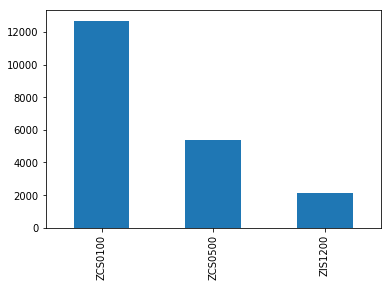

In [174]:
model_df['Material Group'].value_counts().plot(kind='bar')

In [175]:
#model_df.columns
#model_df.to_excel('/home/tcs/Desktop/Ericsson_sample_po_data/po_data_preprocessed.xlsx')

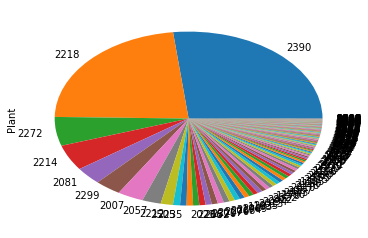

In [169]:
model_df['Plant'].value_counts().plot(kind='pie')

In [88]:
# Dividing datasets to input and output variables. 
y = pd.DataFrame({'Material Group':list(model_df['Material Group'])})
#del model_df['Material Group']
X = pd.DataFrame({'Acct Assignment Cat.':list(model_df['Acct Assignment Cat.']),
                    'Order Unit':list(model_df['Order Unit']),
                    'Plant':list(model_df['Plant']),
                    'Purchasing Doc. Type':list(model_df['Purchasing Doc. Type'])})

In [89]:
#one hot encoding with get_dummies
#model_df = pd.get_dummies(model_df, columns=['Purchasing Doc. Type','Material Group','Acct Assignment Cat.','Order Unit'])
y = pd.get_dummies(y, columns=['Material Group'])  #creating input variableb
X = pd.get_dummies(X, columns=['Purchasing Doc. Type','Acct Assignment Cat.','Order Unit','Plant']) #creating ouput variables

In [90]:
#print y.head().transpose()
#print X.head().transpose()
#print y.idxmax().reset_index().rename(columns={'index':'material_group', 0:'idx'})
#y = pd.DataFrame({'Material Group':list(df['Material Group'])})

In [91]:
# split the data into train, test and validation sets

#diving dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8)

#diving input training dataset into train and valdiation datasets
X_train, X_val = train_test_split(X_train,test_size=0.1,train_size=0.9)

#diving output training dataset into train and valdiation datasets
y_train, y_val = train_test_split(y_train,test_size=0.1,train_size=0.9)

In [92]:
print "Shape of input train dataset:",X_train.shape
print "Shape of input test dataset:",X_test.shape
print "Shape of input validation dataset:",X_val.shape
print "Shape of ouput train dataset:",y_train.shape
print "Shape of output test dataset:",y_test.shape
print "Shape of output validation dataset:",y_val.shape

Shape of input train dataset: (14511, 198)
Shape of input test dataset: (4032, 198)
Shape of input validation dataset: (1613, 198)
Shape of ouput train dataset: (14511, 3)
Shape of output test dataset: (4032, 3)
Shape of output validation dataset: (1613, 3)


In [93]:
'''
X_train = pd.DataFrame.as_matrix(X_train)
X_test = pd.DataFrame.as_matrix(X_test)
X_val = pd.DataFrame.as_matrix(X_val)
y_train = pd.DataFrame.as_matrix(y_train)
y_test = pd.DataFrame.as_matrix(y_test)
y_val = pd.DataFrame.as_matrix(y_val)
'''

'\nX_train = pd.DataFrame.as_matrix(X_train)\nX_test = pd.DataFrame.as_matrix(X_test)\nX_val = pd.DataFrame.as_matrix(X_val)\ny_train = pd.DataFrame.as_matrix(y_train)\ny_test = pd.DataFrame.as_matrix(y_test)\ny_val = pd.DataFrame.as_matrix(y_val)\n'

# Model Buliding

In [94]:
# keras libraries
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers
from keras.layers import Dropout
from keras import metrics
from keras.constraints import *
from keras.optimizers import SGD

# plot library for plotting accuracy graphs
import matplotlib.pyplot as plot

In [113]:
# Build the model with  relu activation function and optimizer as rmsprop

epoch = 100 # number of epocs are chosen here for entire experiment

def seq_model():
    # Building the Neural Net model

    model = Sequential()
    model.add(Dense(128, input_dim=198, activation='relu',))
    model.add(Dense(64,  activation='relu'))
    model.add(Dense(32,  activation='relu'))
    #model.add(Dense(64,  activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

def sgd_model():
    # Building the Neural Net model
    
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=198))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

def seq_dropout_model():
    # Building the Neural Net model
    
    model = Sequential()
    model.add(Dense(128, input_dim=198, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64,  activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32,  activation='relu'))
    model.add(Dropout(0.5))
    #model.add(Dense(64,  activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

def binary_dropout_model():
    # Building the Neural Net model
    
    model = Sequential()
    model.add(Dense(128, input_dim=198, kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.l2(0.0001),
                activity_regularizer=regularizers.l1(0.0001)))
    model.add(Dropout(0.2))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, kernel_initializer='normal',activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [114]:
nodropout_model =  seq_model()
nodropoutrmsprop = nodropout_model.fit(X_train.values, y_train.values, epochs=epoch,batch_size=128, validation_data=(X_val.values,y_val.values))

Train on 14511 samples, validate on 1613 samples
Epoch 1/100
14511/14511 [==============================] - 0s - loss: 0.8839 - acc: 0.6317 - val_loss: 0.9051 - val_acc: 0.6187
Epoch 2/100
14511/14511 [==============================] - 0s - loss: 0.8744 - acc: 0.6341 - val_loss: 0.9059 - val_acc: 0.6187
Epoch 3/100
14511/14511 [==============================] - 0s - loss: 0.8728 - acc: 0.6341 - val_loss: 0.9182 - val_acc: 0.6187
Epoch 4/100
14511/14511 [==============================] - 0s - loss: 0.8723 - acc: 0.6341 - val_loss: 0.9041 - val_acc: 0.6187
Epoch 5/100
14511/14511 [==============================] - 0s - loss: 0.8707 - acc: 0.6341 - val_loss: 0.9088 - val_acc: 0.6187
Epoch 6/100
14511/14511 [==============================] - 0s - loss: 0.8701 - acc: 0.6341 - val_loss: 0.9081 - val_acc: 0.6187
Epoch 7/100
14511/14511 [==============================] - 0s - loss: 0.8696 - acc: 0.6341 - val_loss: 0.9067 - val_acc: 0.6187
Epoch 8/100
14511/14511 [==============================

In [115]:
dropout_model =  seq_dropout_model()
dropoutrmsprop = dropout_model.fit(X_train.values, y_train.values, epochs=epoch,batch_size=128, validation_data=(X_val.values,y_val.values))

Train on 14511 samples, validate on 1613 samples
Epoch 1/100
14511/14511 [==============================] - 0s - loss: 0.9486 - acc: 0.5982 - val_loss: 0.9067 - val_acc: 0.6187
Epoch 2/100
14511/14511 [==============================] - 0s - loss: 0.9008 - acc: 0.6339 - val_loss: 0.9065 - val_acc: 0.6187
Epoch 3/100
14511/14511 [==============================] - 0s - loss: 0.8949 - acc: 0.6341 - val_loss: 0.9060 - val_acc: 0.6187
Epoch 4/100
14511/14511 [==============================] - 0s - loss: 0.8870 - acc: 0.6341 - val_loss: 0.9046 - val_acc: 0.6187
Epoch 5/100
14511/14511 [==============================] - 0s - loss: 0.8847 - acc: 0.6341 - val_loss: 0.9045 - val_acc: 0.6187
Epoch 6/100
14511/14511 [==============================] - 0s - loss: 0.8834 - acc: 0.6341 - val_loss: 0.9043 - val_acc: 0.6187
Epoch 7/100
14511/14511 [==============================] - 0s - loss: 0.8815 - acc: 0.6341 - val_loss: 0.9042 - val_acc: 0.6187
Epoch 8/100
14511/14511 [==============================

In [116]:
#sgdmodel = sgd_model()
#sgd = sgdmodel.fit(X_train.values, y_train.values, epochs=epoch,batch_size=128, validation_data=(X_val.values,y_val.values))

In [117]:
#binary_dropout_model =  seq_dropout_model()
#binary_dropoutrmsprop = binary_dropout_model.fit(X_train.values, y_train.values, epochs=epoch,batch_size=128, validation_data=(X_val.values,y_val.values))

In [119]:
print dropout_model.evaluate(X_test.values,y_test.values,batch_size=32)
print nodropout_model.evaluate(X_test.values,y_test.values,batch_size=32)
#print sgdmodel.evaluate(X_test.values,y_test.values,batch_size=128)
#print binary_dropout_model.evaluate(X_test.values,y_test.values,batch_size=128)

2944/4032 [====================>.........] - ETA: 0s[0.96796765686973696, 0.62127976190476186]


# Plotting

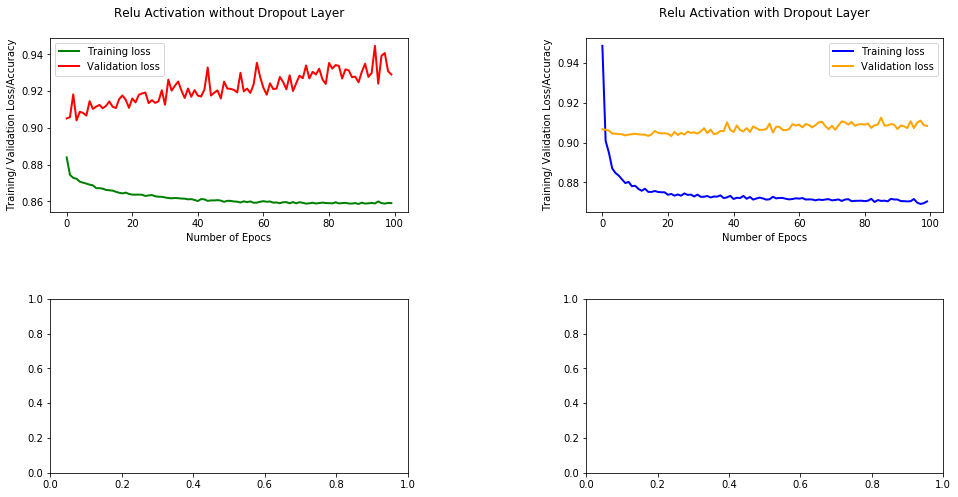

In [120]:
# Create the figure with one row and two columns. figsize will define the figure 
#plot.subplots?
fig, axes = plot.subplots(2, 2, figsize=(16,8))


# Create the line chart on the first position with the given configurations
axes[0, 0].plot(range(epoch),nodropoutrmsprop.history['loss'],linewidth=2, color='green', label='Training loss')
axes[0, 0].plot(range(epoch),nodropoutrmsprop.history['val_loss'],linewidth=2, color='red',label='Validation loss')
#axes[0, 0].plot(range(epoch),nodropoutrmsprop.history['acc'],linewidth=2, color='blue',label='Training accuracy')
#axes[0, 0].plot(range(epoch),nodropoutrmsprop.history['val_acc'],linewidth=2, color='yellow',label='Validation accuracy')
axes[0, 0].set(title="Relu Activation without Dropout Layer\n", xlabel="Number of Epocs", ylabel="Training/ Validation Loss/Accuracy")
axes[0, 0].legend()

axes[0, 1].plot(range(epoch),dropoutrmsprop.history['loss'],linewidth=2, color='blue', label='Training loss')
axes[0, 1].plot(range(epoch),dropoutrmsprop.history['val_loss'],linewidth=2, color='orange',label='Validation loss')
#axes[0, 1].plot(range(epoch),dropoutrmsprop.history['acc'],linewidth=2, color='green',label='Training accuracy')
#axes[0, 1].plot(range(epoch),dropoutrmsprop.history['val_acc'],linewidth=2, color='red',label='Validation accuracy')
axes[0, 1].set(title="Relu Activation with Dropout Layer\n", xlabel="Number of Epocs", ylabel="Training/ Validation Loss/Accuracy")
axes[0, 1].legend()
'''
axes[1, 0].plot(range(epoch),sgd.history['loss'],linewidth=2, color='brown', label='Training loss')
axes[1, 0].plot(range(epoch),sgd.history['val_loss'],linewidth=2, color='black',label='Validation loss')
axes[0, 0].plot(range(epoch),sgd.history['acc'],linewidth=2, color='blue',label='Training accuracy')
axes[0, 0].plot(range(epoch),sgd.history['val_acc'],linewidth=2, color='yellow',label='Validation accuracy')
axes[1, 0].set(title="Relu Activation with Dropout Layer(sgd optimizer)\n", xlabel="Number of Epocs", ylabel="Training/ Validation Loss/Accuracy")
axes[1, 0].legend()

axes[1, 1].plot(range(epoch),binary_dropoutrmsprop.history['loss'],linewidth=2, color='maroon', label='Training loss')
axes[1, 1].plot(range(epoch),binary_dropoutrmsprop.history['val_loss'],linewidth=2, color='violet',label='Validation loss')
axes[0, 0].plot(range(epoch),binary_dropoutrmsprop.history['acc'],linewidth=2, color='blue',label='Training accuracy')
axes[0, 0].plot(range(epoch),binary_dropoutrmsprop.history['val_acc'],linewidth=2, color='yellow',label='Validation accuracy')
axes[1, 1].set(title="Relu Activation with Dropout Layer(Binary_crossentropy)\n", xlabel="Number of Epocs", ylabel="Training/ Validation Loss/Accuracy")
axes[1, 1].legend()
'''
# Adjust the space between the two charts
plot.subplots_adjust(wspace=0.5,hspace=0.5)
plot.show()

# Post Processing

In [121]:
#print X_test[:1]
#print y[:1]
#print dropout_model.predict(X_test.values)
predit_results = pd.DataFrame(nodropout_model.predict(X_test.values), columns=['predicted-Material-Group_ZCS0100','predicted-Material-Group_ZCS0500','predicted-Material-Group_ZIS1200'])
#print sgdmodel.predict(X_test.values)[:1]
print predit_results
print y_test

      predicted-Material-Group_ZCS0100  predicted-Material-Group_ZCS0500  \
0                             0.610960                          0.268587   
1                             0.577698                          0.317970   
2                             0.610960                          0.268587   
3                             0.610960                          0.268587   
4                             0.619246                          0.262071   
5                             0.575986                          0.332857   
6                             0.604184                          0.287982   
7                             0.610960                          0.268587   
8                             0.619246                          0.262071   
9                             0.759610                          0.235430   
10                            0.596531                          0.222236   
11                            0.604184                          0.287982   
12          

In [122]:
from collections import defaultdict

def reverse_dummy(df_dummies):
    pos = defaultdict(list)
    vals = defaultdict(list)

    for i, c in enumerate(df_dummies.columns):
        if "_" in c:
            k, v = c.split("_", 1)
            pos[k].append(i)
            vals[k].append(v)
        else:
            pos["_"].append(i)

    df = pd.DataFrame({k: pd.Categorical.from_codes(
                              np.argmax(df_dummies.iloc[:, pos[k]].values, axis=1),
                              vals[k])
                      for k in vals})

    df[df_dummies.columns[pos["_"]]] = df_dummies.iloc[:, pos["_"]]
    return df

In [123]:
#print X_test
#print y_test
#reverse_dummy(y_test)[:5]

In [124]:
#predit_results[''] = predit_results[['ZCS0100','ZCS0500','ZIS1200']].max(axis=1)
#predit_results.idxmax(axis=1)
predit_results = predit_results.apply(lambda row: row.replace(max(row), 1), axis=1)
#reverse_dummy(predit_results)

In [125]:
#print reverse_dummy(predit_results)
#print reverse_dummy(y_test)
final_df = reverse_dummy(y_test).join(reverse_dummy(predit_results))

In [126]:
final_df = final_df.join(reverse_dummy(X_test))

In [127]:
final_df.head()

,Material Group,predicted-Material-Group,Acct Assignment Cat.,Order Unit,Plant,Purchasing Doc. Type
0,ZCS0100,ZCS0100,K,EA,2214,ECPO
1,ZCS0100,ZCS0100,F,EA,2299,NB
2,ZCS0100,ZCS0100,K,EA,2214,ECPO
3,ZCS0100,ZCS0100,K,EA,2214,ECPO
4,ZCS0100,ZCS0100,P,EA,2390,ZECP


In [134]:
final_df.to_csv("predicted_output.csv")